In [1]:
%%bash
echo $CMSSW_BASE
echo $PWD

/afs/cern.ch/work/i/innocent/public/code/s7/CMSSW_9_3_0_pre2
/afs/cern.ch/user/i/innocent/pyTools


In [2]:
%%bash
uname -a
whoami

edmFileUtil root://eoscms.cern.ch///store/relval/CMSSW_9_3_0_pre3/RelValSingleMuPt100/GEN-SIM-RECO/92X_upgrade2017_realistic_v10_resub-v1/00000/3C1A3236-AE7C-E711-ACA8-0025905A60FE.root



Linux vinavx3.cern.ch 3.10.0-514.10.2.el7.x86_64 #1 SMP Fri Mar 3 00:04:05 UTC 2017 x86_64 x86_64 x86_64 GNU/Linux
innocent
root://eoscms.cern.ch///store/relval/CMSSW_9_3_0_pre3/RelValSingleMuPt100/GEN-SIM-RECO/92X_upgrade2017_realistic_v10_resub-v1/00000/3C1A3236-AE7C-E711-ACA8-0025905A60FE.root
root://eoscms.cern.ch///store/relval/CMSSW_9_3_0_pre3/RelValSingleMuPt100/GEN-SIM-RECO/92X_upgrade2017_realistic_v10_resub-v1/00000/3C1A3236-AE7C-E711-ACA8-0025905A60FE.root (1 runs, 60 lumis, 6000 events, 1208929930 bytes)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import time

In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [5]:
from DataFormats.FWLite import Handle, Events

Welcome to JupyROOT 6.10/01


In [6]:
singleMU100 = "root://eoscms.cern.ch///store/relval/CMSSW_9_3_0_pre3/RelValSingleMuPt100/GEN-SIM-RECO/92X_upgrade2017_realistic_v10_resub-v1/00000/3C1A3236-AE7C-E711-ACA8-0025905A60FE.root"

label = "generalTracks"
quality = "highPurity"

In [7]:
def nt(fevents) :
    events = Events(fevents)
    tracks = Handle("std::vector<reco::Track>")
    nt = []
    for i in range(0,1000) : # events.size()):
      a= events.to(i)
      if (i%500==0) : print "Event", i 
      a=events.getByLabel(label, tracks)
      nt.append(tracks.product().size())
    print len(nt)
    return nt

Event 0
Event 500
1000


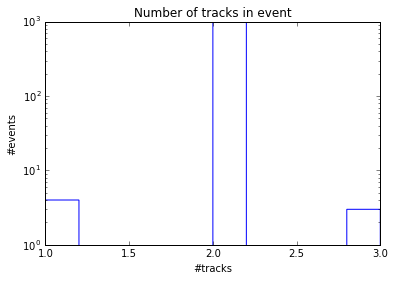

Warning in <TClass::Init>: no dictionary for class edm::Wrapper<edm::DetSetVector<CTPPSPixelCluster> > is available
Warning in <TClass::Init>: no dictionary for class edm::DetSetVector<CTPPSPixelCluster> is available


In [8]:
nt = nt(singleMU100)
fig, ax = plt.subplots()
ax.hist(nt,histtype='step', fill=False)
ax.set_title('Number of tracks in event')
ax.set_xlabel('#tracks')
ax.set_ylabel('#events')
plt.yscale('log', nonposy='clip')
plt.show()

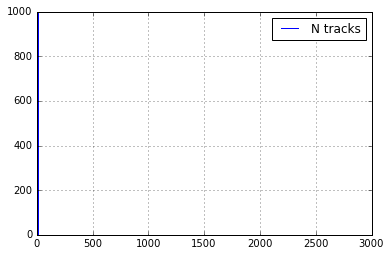

In [9]:
y,x = np.histogram(nt,np.linspace(0.,3000.,300))
x.resize(len(y))
plt.step(x,y,where='post',label='N tracks')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

In [10]:
# testBit() returns a nonzero result, 2**offset, if the bit at 'offset' is one.
def testBit(int_type, offset):
    mask = 1 << offset
    return(int_type & mask)

def onlyBit(int_type, offset):
    mask = 1 << offset
    return(int_type ^ mask)

In [11]:
def hpa(pattern) :
    pxp = 0
    mul = 1
    for i in range(1,5) :
        if pattern.hasValidHitInPixelLayer(1,i) : pxp+=mul
        mul *=10
    for i in range(1,4) :
        if pattern.hasValidHitInPixelLayer(2,i) : pxp+=mul
        mul *=10
    return pxp, 10*pattern.numberOfValidTIBLayersWithMonoAndStereo(0)+pattern.numberOfValidTIDLayersWithMonoAndStereo(0)

In [12]:
def loadTk(fevents) :
    print fevents
    events = Events(fevents)
    print events.size()
    tracks = Handle("std::vector<reco::Track>")
    evidsA = []
    tkParsA = []
    tkHitsA = []
    for i in range(0,events.size()) :
      if (len(tkParsA) > 1000000) : break
      a= events.to(i)
      id = events.object().id()
      evid = '{:d}:{:d}:{:d}'.format(int(id.run()),int(id.luminosityBlock()), int(id.event()))
      if (i%500==0) : 
        print "Event", i , evid, len(tkParsA)
      a=events.getByLabel(label, tracks)
      for tk in tracks.product() :
        # if (not tk.quality(tk.qualityByName(quality))) : continue
        pattern = tk.hitPattern()
        p,t = hpa(pattern)
        evidsA.append(evid)
        tkParsA.append([tk.eta(),tk.phi(),tk.pt(),tk.dz(),tk.ndof(),tk.chi2()])
        tkHitsA.append([pattern.numberOfValidHits(),pattern.numberOfValidPixelHits(),tk.originalAlgo()-4,tk.algoMaskUL(),
                       p,t])

    print len(tkParsA)
    tkPars = np.array(zip(*tkParsA), dtype=np.float)
    print len(tkPars)
    tkHits = np.array(zip(*tkHitsA), dtype=np.int)
    print len(tkHits)
    evids = np.array(evidsA,dtype=np.str)
    return (evids,tkPars,tkHits)

In [13]:
def loadFile() :
    loaded = np.load('/tmp/singleMuon100.npz')
    return loaded['evids'],loaded['tkPars'], loaded['tkHits']

In [14]:
fromAOD = True
evids, tkPars, tkHits = loadTk(singleMU100) if fromAOD else loadFile()

root://eoscms.cern.ch///store/relval/CMSSW_9_3_0_pre3/RelValSingleMuPt100/GEN-SIM-RECO/92X_upgrade2017_realistic_v10_resub-v1/00000/3C1A3236-AE7C-E711-ACA8-0025905A60FE.root
6000
Event 0 1:1:2 0
Event 500 1:3:205 998
Event 1000 1:11:1004 1999
Event 1500 1:18:1707 2995
Event 2000 1:20:1902 3993
Event 2500 1:49:4803 4992
Event 3000 1:61:6006 5991
Event 3500 1:68:6703 6991
Event 4000 1:71:7007 7989
Event 4500 1:77:7603 8990
Event 5000 1:84:8303 9993
Event 5500 1:83:8202 10993
11995
6
6


In [15]:
if fromAOD :
    np.savez_compressed('/tmp/singleMU100',evids=evids, tkPars=tkPars, tkHits=tkHits)

In [16]:
%%bash
ls -l /tmp/singleMU100*

-rw-r--r--. 1 innocent zh 480603 Sep 10 12:04 /tmp/singleMU100.npz


In [17]:
def nhit(var,tkPars, tkHits) :
    hp = np.greater(tkPars[2],4.)
    notQ = np.equal(tkHits[2],18)|np.equal(tkHits[2],1)|np.equal(tkHits[2],2)|np.equal(tkHits[2],3)
    quad = np.equal(tkHits[2],0)|np.equal(tkHits[2],19)|np.equal(tkHits[2],20)
    mu = np.not_equal(testBit(tkHits[3],4+9),0)
    nbins=62
    yn,x = np.histogram(tkPars[var],np.linspace(-3.1,3.1,nbins),weights=1.*tkHits[0]*hp)
    ya,x = np.histogram(tkPars[var],np.linspace(-3.1,3.1,nbins),weights=1.*hp)
    x.resize(len(ya))
    return x,yn/ya,ya
    

In [18]:
def printMu(evids, tkPars, tkHits) :
    mu = np.equal(tkHits[2],10)
#    mu = np.not_equal(testBit(tkHits[3],4+10),0)
    for i in range(0,len(mu)) :
        if (mu[i]) : 
            print "'{:s}-{:s}',".format(evids[i],evids[i])
            #print evids[i],tkPars[0][i],tkPars[1][i],tkPars[2][i],tkPars[3][i],\
            #tkHits[0][i],tkHits[1][i],tkHits[4][i],tkHits[5][i]

'1:8:735-1:8:735',
'1:10:912-1:10:912',
'1:2:129-1:2:129',
'1:2:147-1:2:147',
'1:5:485-1:5:485',
'1:11:1007-1:11:1007',
'1:12:1146-1:12:1146',
'1:22:2163-1:22:2163',
'1:21:2012-1:21:2012',
'1:21:2090-1:21:2090',
'1:29:2859-1:29:2859',
'1:29:2862-1:29:2862',
'1:29:2879-1:29:2879',
'1:71:7015-1:71:7015',
'1:72:7192-1:72:7192',
'1:73:7210-1:73:7210',
'1:74:7340-1:74:7340',
'1:77:7674-1:77:7674',
'1:78:7797-1:78:7797',
'1:86:8536-1:86:8536',
'1:86:8543-1:86:8543',
'1:82:8174-1:82:8174',
18.0 12 2

/cvmfs/cms.cern.ch/slc7_amd64_gcc630/external/py2-pippkgs/5.0-ghjeda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in divide
  # Remove the CWD from sys.path while we load stuff.


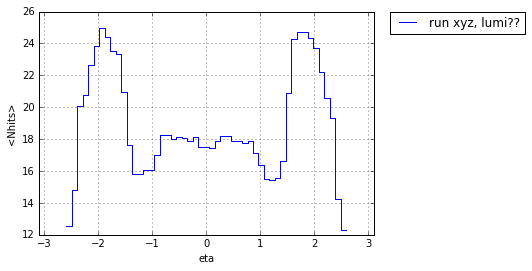

In [19]:
printMu(evids,tkPars, tkHits)

print tkPars[4][0],tkHits[0][0],tkHits[1][0],
eta=0
phi=1
pt=2

var = eta
x,y,ya = nhit(eta,tkPars, tkHits)

plt.step(x,y,where='post',label='run xyz, lumi??')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(-3.1, 3.1)
plt.xlabel('eta')
plt.ylabel('<Nhits>')
plt.show()